In [4]:
import os
import zipfile

In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 8.5 MB/s eta 0:00:00


In [1]:
# Check GPU
import torch
print('CUDA available:', torch.cuda.is_available())

CUDA available: True


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
zip_file_path = "/content/drive/MyDrive/dataset.zip"

extract_path = '/content/dataset'

# extract file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [7]:
#upload file train.yaml
from google.colab import files

uploaded = files.upload()

Saving train.yaml to train.yaml


In [8]:
#upload file train.py
from google.colab import files

uploaded = files.upload()

Saving train.py to train.py


In [9]:
!python train.py


100% 6.25M/6.25M [00:00<00:00, 24.7MB/s]
Ultralytics YOLOv8.2.85 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=train.yaml, epochs=30, time=None, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=models, name=classification_of_dog_and_cat_v1, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

In [11]:
from google.colab import files

# download file
files.download('/content/models/classification_of_dog_and_cat_v1')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# list file
!ls models/classification_of_dog_and_cat_v1


args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1725164924.028943826ab7.1417.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch10020.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch10021.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch10022.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


In [17]:
from ultralytics import YOLO
model = YOLO('models/classification_of_dog_and_cat_v1/weights/best.pt')

# run to predict
results = model.predict(source='/content/drive/MyDrive/single_prediction', save=True)


image 1/11 /content/drive/MyDrive/single_prediction/cat_or_dog_1.jpg: 480x640 1 dog, 37.9ms
image 2/11 /content/drive/MyDrive/single_prediction/cat_or_dog_10.jpg: 448x640 1 dog, 34.3ms
image 3/11 /content/drive/MyDrive/single_prediction/cat_or_dog_11.jpg: 384x640 1 dog, 75.7ms
image 4/11 /content/drive/MyDrive/single_prediction/cat_or_dog_2.jpg: 384x640 1 cat, 9.0ms
image 5/11 /content/drive/MyDrive/single_prediction/cat_or_dog_3.jpg: 480x640 1 cat, 11.0ms
image 6/11 /content/drive/MyDrive/single_prediction/cat_or_dog_4.jpg: 352x640 1 dog, 68.9ms
image 7/11 /content/drive/MyDrive/single_prediction/cat_or_dog_5.jpg: 480x640 1 cat, 8.0ms
image 8/11 /content/drive/MyDrive/single_prediction/cat_or_dog_6.jpg: 352x640 1 cat, 7.6ms
image 9/11 /content/drive/MyDrive/single_prediction/cat_or_dog_7.jpg: 416x640 1 cat, 34.2ms
image 10/11 /content/drive/MyDrive/single_prediction/cat_or_dog_8.jpg: 640x480 1 cat, 33.9ms
image 11/11 /content/drive/MyDrive/single_prediction/cat_or_dog_9.jpg: 576x640 

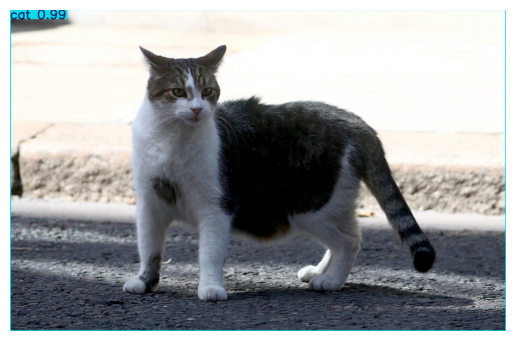

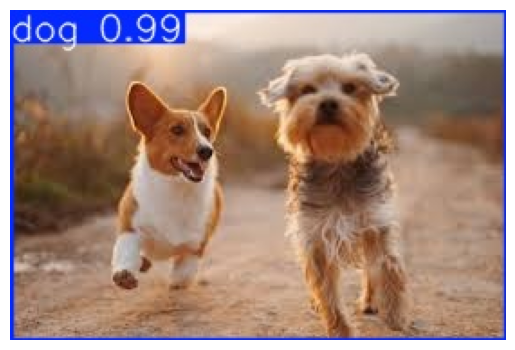

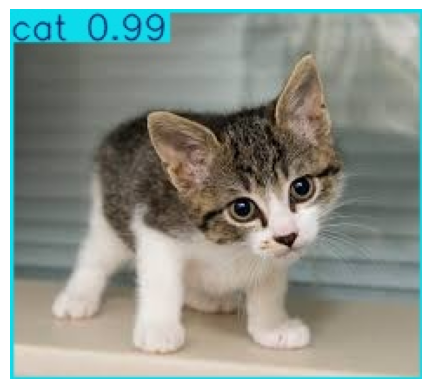

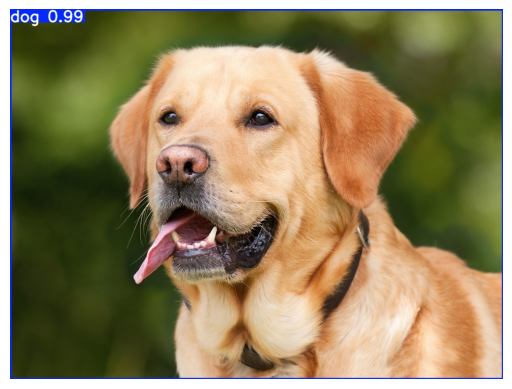

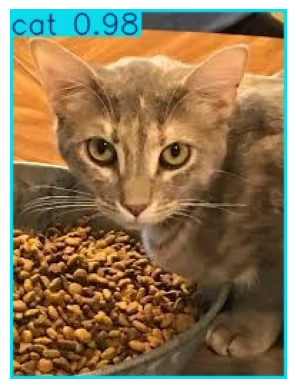

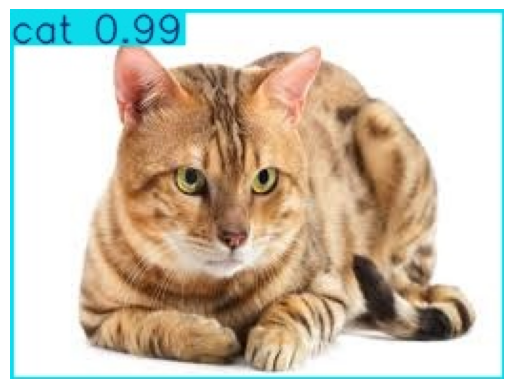

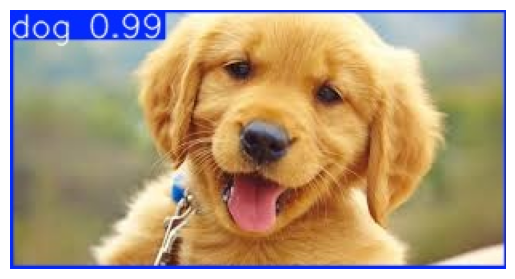

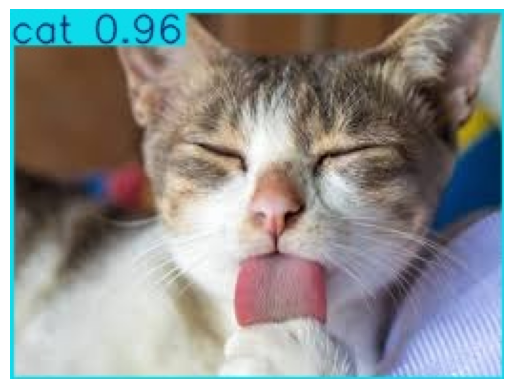

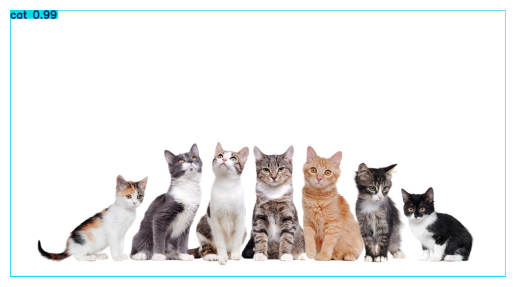

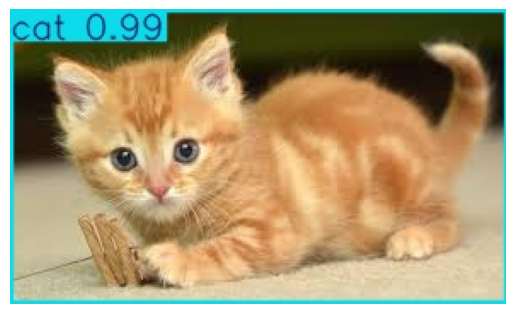

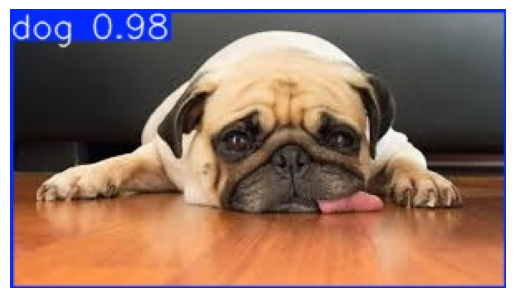

In [20]:
import matplotlib.pyplot as plt
import cv2
import glob

# list images
result_images = glob.glob('runs/detect/predict/*.jpg')

# show
for img_path in result_images:
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
